In [3]:
import numpy as np
import cv2
from scipy.ndimage import convolve
import bob.bio.vein.extractor as be
import bob.bio.vein.preprocessor as bp
from PIL import Image
import matplotlib.pyplot as plt
from src.preprocess import *

In [4]:
image = np.asarray(Image.open('HERE_INSERT_PATH_TO_IMAGE').convert('L'))

FileNotFoundError: [Errno 2] No such file or directory: '/home/xvenc/skool/mit/bio/bio-project/bvein/HERE_INSERT_PATH_TO_IMAGE'

In [5]:
def get_avg_heights(mask: np.ndarray, batch_size=20) -> list:
    img_h, img_w = mask.shape
    half_img_h = img_h // 2  # Middle point of the image (integer division)

    # Arrays to store top border pixel positions in the upper half
    top_pixels_upper_half = np.full(img_w, -1, dtype=int)

    # Iterate over each column to find top-most `True` values in the upper half
    for col in range(img_w):
        true_indices_upper_half = np.where(mask[:half_img_h, col])[0]  # Top half only
        
        if len(true_indices_upper_half) > 0:
            top_pixels_upper_half[col] = true_indices_upper_half[0]  # Top-most `True` value in the upper half

    # List to store average heights for every 20 pixels
    avg_heights = []
    
    # Iterate over every 20 columns
    for start_col in range(0, img_w, batch_size):
        end_col = min(start_col + batch_size, img_w)  # Ensure we don't go out of bounds
        valid_heights = top_pixels_upper_half[start_col:end_col][top_pixels_upper_half[start_col:end_col] != -1]  # Get valid heights

        if len(valid_heights) > 0:
            avg_height = np.mean(valid_heights)  # Compute the average height
            avg_heights.append(avg_height)
        else:
            avg_heights.append(np.nan)  # If no valid heights, append NaN

    return avg_heights

#### Image without any preprocessing (with artefacts)

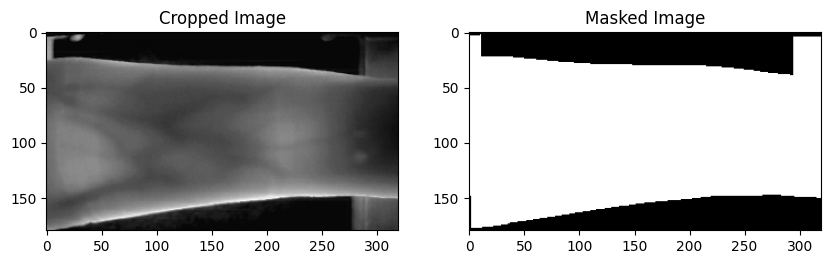

In [ ]:
cropper = bp.FixedCrop(top=30, bottom=30)

cropped_image = cropper(image)
masked_image = lee_mask(cropped_image, filter_height=4, filter_width=20)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cropped_image, cmap='gray')
ax[0].set_title('Cropped Image')
ax[1].imshow(masked_image, cmap='gray')
ax[1].set_title('Masked Image')
plt.show()

#### Image without with simple preprocessing (method 1)

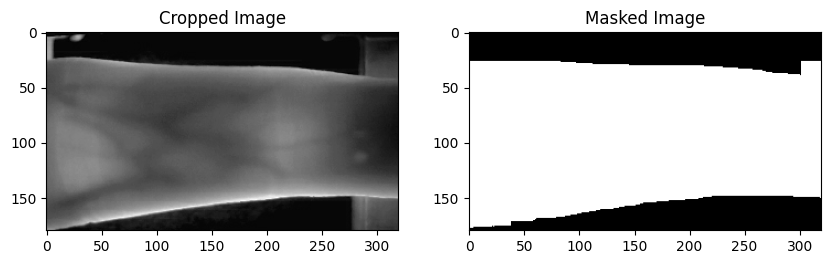

In [ ]:
cropper = bp.FixedCrop(top=30, bottom=30)

cropped_image = cropper(image)
masked_image = lee_mask(cropped_image)
avg_height = get_avg_height(masked_image)
masked_image = adjust_columns_to_average_height(masked_image, int(avg_height), 20)
avg_height = get_avg_height(masked_image)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cropped_image, cmap='gray')
ax[0].set_title('Cropped Image')
ax[1].imshow(masked_image, cmap='gray')
ax[1].set_title('Masked Image')
plt.show()

#### Image without with simple preprocessing (method 2)

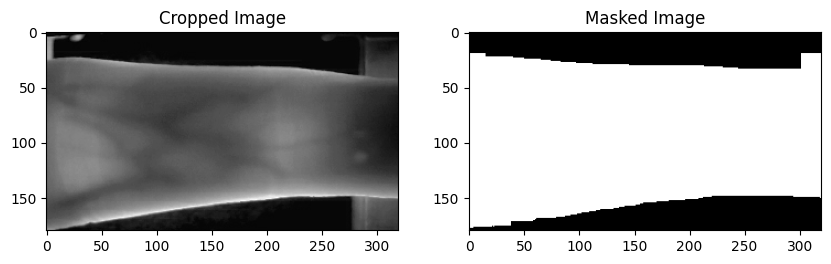

In [ ]:
cropper = bp.FixedCrop(top=30, bottom=30)

cropped_image = cropper(image)
masked_image = lee_mask(cropped_image)
avg_height = get_avg_height(masked_image)
masked_image = adjust_columns_to_average_height_2(masked_image, (avg_height), 20, 0.25)
avg_height = get_avg_height(masked_image)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cropped_image, cmap='gray')
ax[0].set_title('Cropped Image')
ax[1].imshow(masked_image, cmap='gray')
ax[1].set_title('Masked Image')
plt.show()